# Generating the Plots of the Denoising Results

In this notebook we reproduce the denoising results shown in figure 4 of the paper. We start by importing the required libraires, setting the plot parameters and loading the result data.

In [20]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#set plot parameters
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22 
plt.rcParams['font.size'] = 20 
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5 
plt.rcParams['legend.fontsize'] = 18 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.titlepad'] = 20.0
plt.rcParams.update({'errorbar.capsize': 4})

color_score = 'tab:red'
color_sra = 'tab:blue'

#load result data (pix=pixel, ell=ellipticity)
error_pix_score = np.load('denoising_pixel_error_score.npy')
error_ell_score = np.load('denoising_ellipticity_error_score.npy')

error_pix_sra= np.load('denoising_pixel_error_sparse.npy')
error_ell_sra = np.load('denoising_ellipticity_error_sparse.npy')

#SNR list
SNRs = [40,75,150,380]

Compute the mean and the standard deviation of the pixel and ellipticity error for both SCORE and SRA per SNR.

In [21]:
#initiate the mean and standard deviation lists
mean_pix_sra = []
std_pix_sra = []
mean_ell_sra = []
std_ell_sra = []
mean_pix_score = []
std_pix_score = []
mean_ell_score = []
std_ell_score = []

for pix_sc,pix_sr,ell_sc,ell_sr in zip(error_pix_score,error_pix_sra,error_ell_score,error_ell_sra):
    mean_pix_sra += [np.mean(pix_sr)]
    std_pix_sra += [np.std(pix_sr)]
    mean_ell_sra += [np.mean(ell_sr)]
    std_ell_sra += [np.std(ell_sr)]
    mean_pix_score += [np.mean(pix_sc)]
    std_pix_score += [np.std(pix_sc)]
    mean_ell_score += [np.mean(ell_sc)]
    std_ell_score += [np.std(ell_sc)]

Now we plot the pixel error.

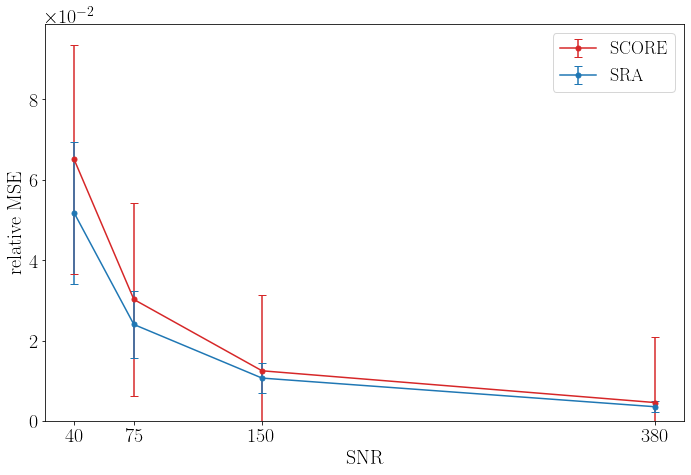

In [22]:
plt.figure(1,figsize=(10,7))
plt.errorbar(SNRs,mean_pix_score,std_pix_score,linestyle='-', marker='o',color=color_score,label='SCORE')
plt.errorbar(SNRs,mean_pix_sra,std_pix_sra,linestyle='-', marker='o',color=color_sra,label='SRA')
plt.ylim(bottom=0)
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.xlabel('SNR')
plt.ylabel('relative MSE')
plt.xticks(SNRs)
plt.legend()
plt.tight_layout()
plt.show()

Finally, we plot the ellipticity error.

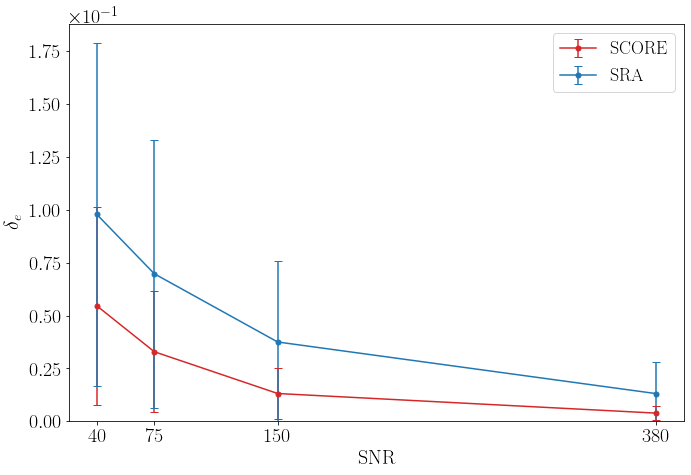

In [23]:
plt.figure(2,figsize=(10,7))
plt.errorbar(SNRs,mean_ell_score,std_ell_score,linestyle='-', marker='o',color=color_score,label=r'SCORE')
plt.errorbar(SNRs,mean_ell_sra,std_ell_sra,linestyle='-', marker='o',color=color_sra,label=r'SRA')
plt.ylim(bottom=0)
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.xticks(SNRs)
plt.xlabel(r'SNR')
plt.ylabel(r'$\delta_e$')
plt.legend()
plt.tight_layout()
plt.show()